# 1.산화 공정에 대해서 조별로 조사 후 설명해 주세요

왜 최신 반도체 공정(Gate Insulator)에서 전통적인 산화 공정이 더 이상 사용되지 않는가?

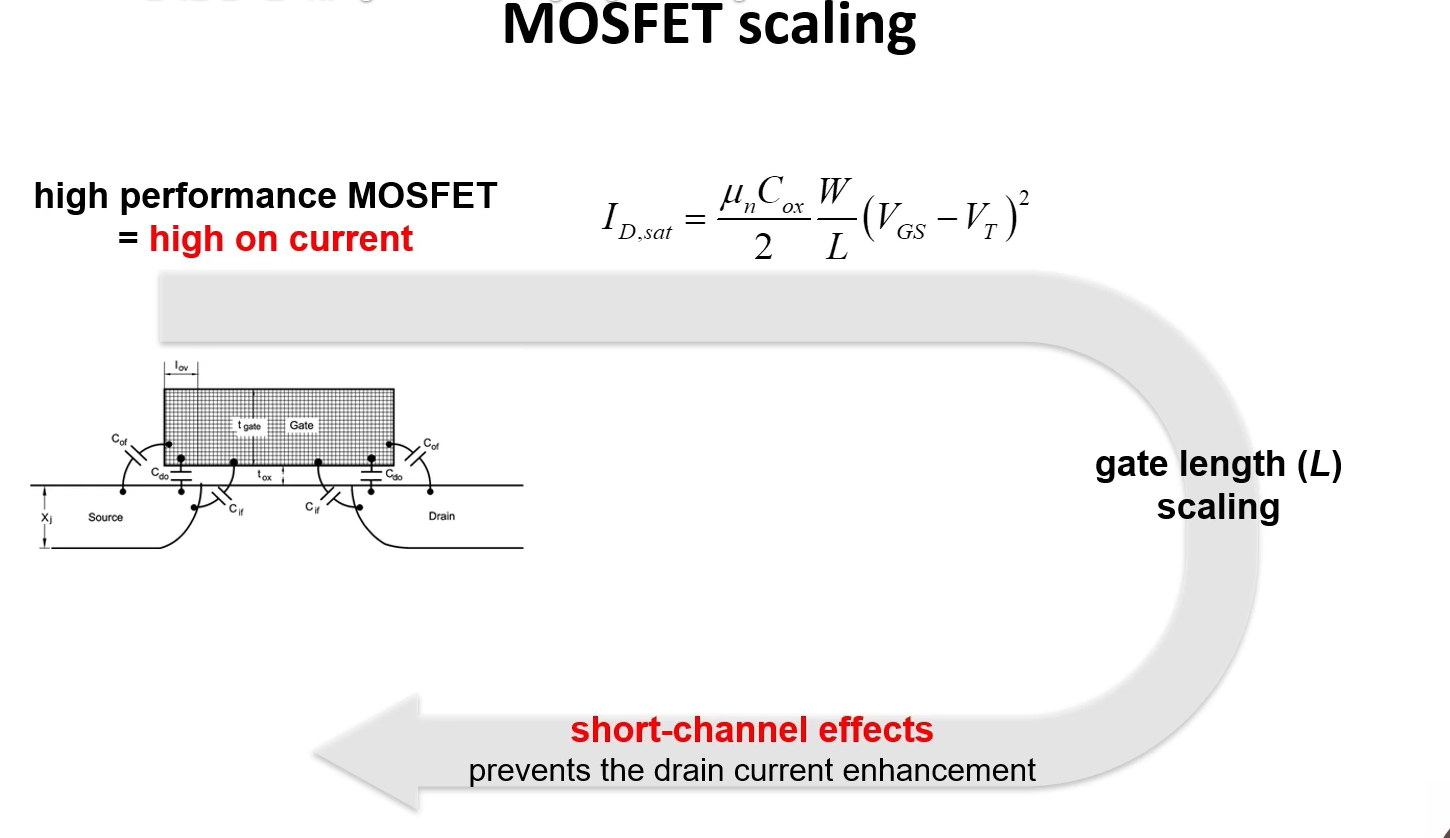

반도체의 핵심 소자인 MOSFET의 성능을 높이기 위해 우리는 끊임없이 소자의 크기를 줄이는 스케일링(Scaling)을 진행해 왔습니다.

핵심 목표: 소자의 'On-Current(전류량)'를 높여 동작 속도를 빠르게 하는 것.

전통적 방법: 게이트의 길이(Gate Length)를 줄이면서, 동시에 게이트 절연막(SiO₂)의 두께를 얇게 만들어 정전용량(Cox)을 키워야 합니다.

산화 공정의 역할: 과거에는 실리콘(Si)을 산화시켜 만든 이산화규소(SiO₂)가 최고의 절연막 역할을 수행했습니다.

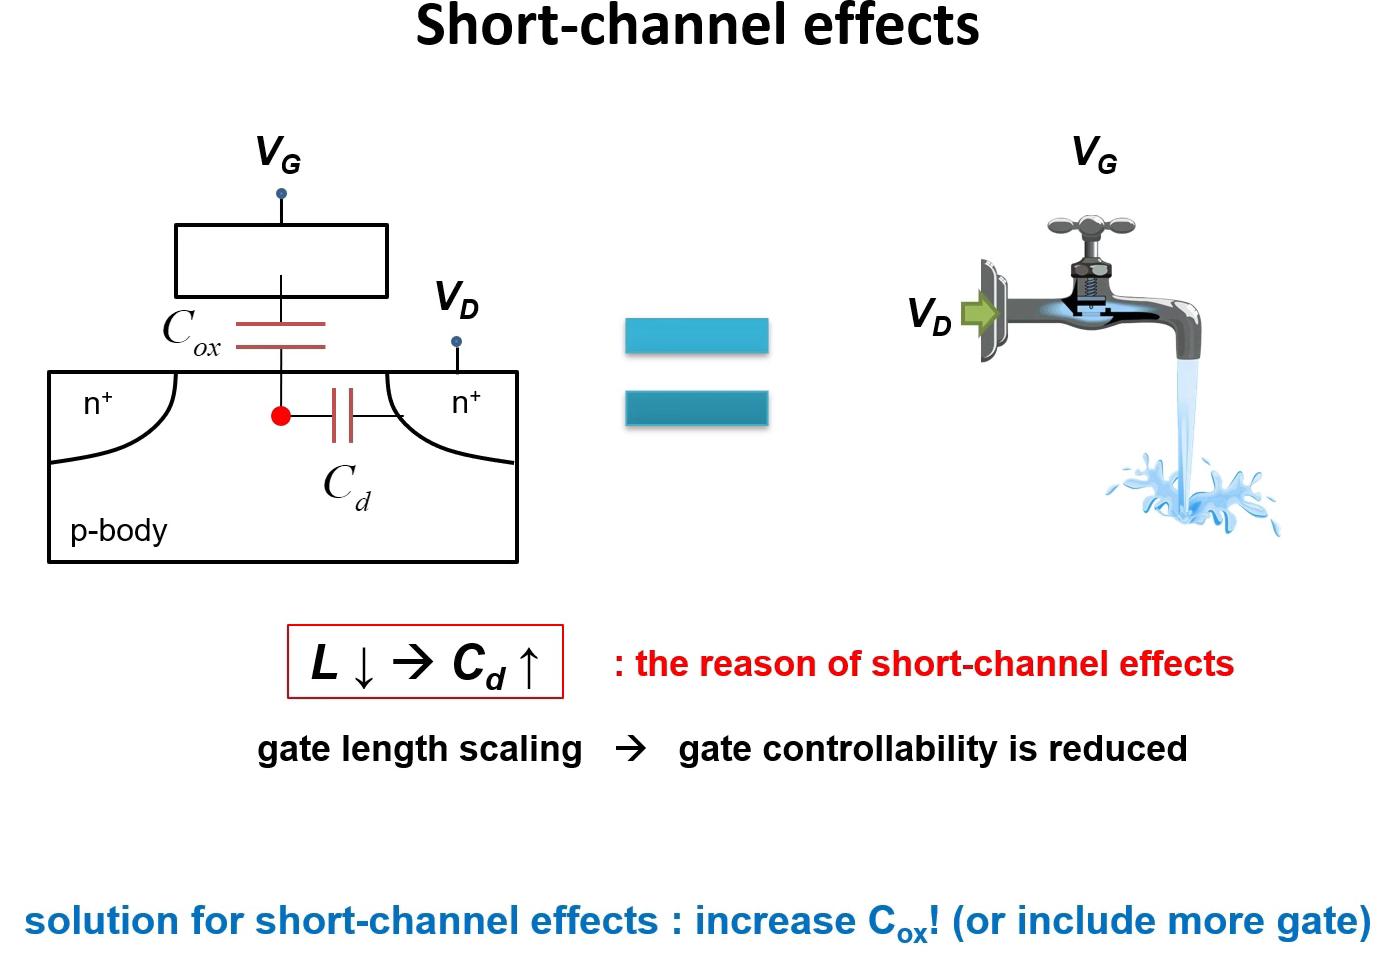

공정이 미세화되면서 산화 공정으로 만든 SiO₂ 절연막 두께를 줄이는 데 물리적인 한계에 봉착했습니다.

직접 터널링(Direct Tunneling): SiO₂ 두께가 약 1.2nm 이하로 얇아지자, 전자가 에너지 장벽을 무시하고 통과해버리는 양자 터널링 현상이 발생했습니다.

누설 전류 급증: 이로 인해 원치 않는 누설 전류(Leakage Current)가 급격히 증가하여, 더 이상 절연체로서의 기능을 수행하지 못하게 되었습니다.

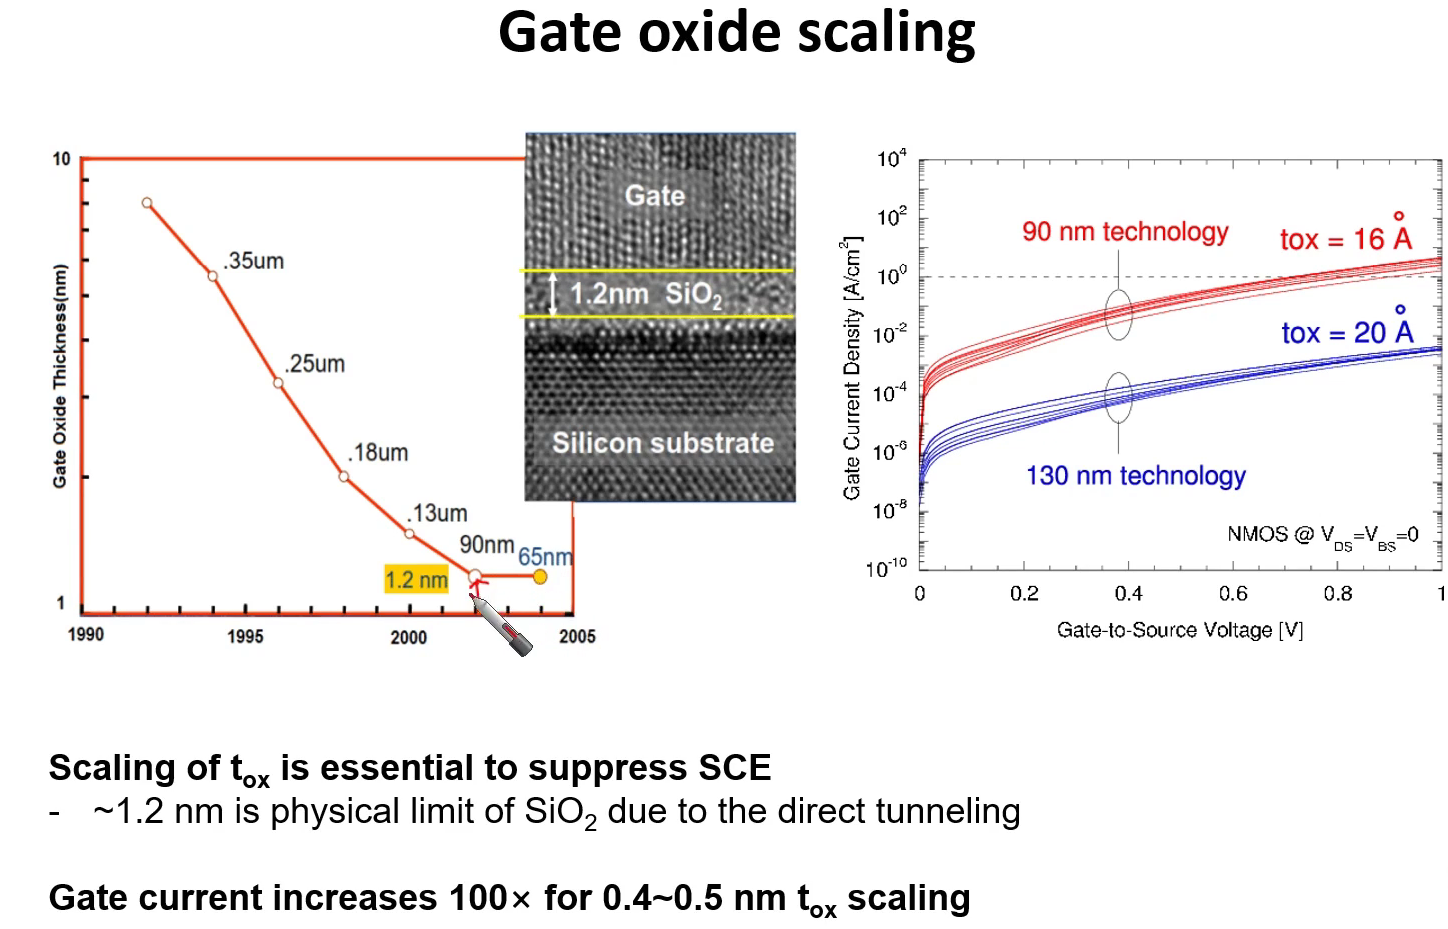

SiO₂의 두께를 줄이는 것이 불가능해지자, 두께는 유지(혹은 증가)하면서도 정전용량(Cox)은 키울 수 있는 고유전율(High-K) 물질을 도입하게 되었습니다.

High-K 물질이란? 유전 상수(K)가 SiO₂(3.9)보다 높은 물질(예: HfO₂, ZrO₂ 등). 물리적 두께를 두껍게 하여 누설 전류를 막으면서도 전기적인 용량은 확보할 수 있습니다.

공정의 변화: High-K 물질은 실리콘 산화물이 아니므로, 기존의 '산화(Oxidation)' 공정이 아닌 '증착(Deposition)' 공정을 통해 형성합니다. 즉, 최신 공정의 게이트 절연막 형성 단계에서는 산화 공정이 사라지게 된 것입니다.

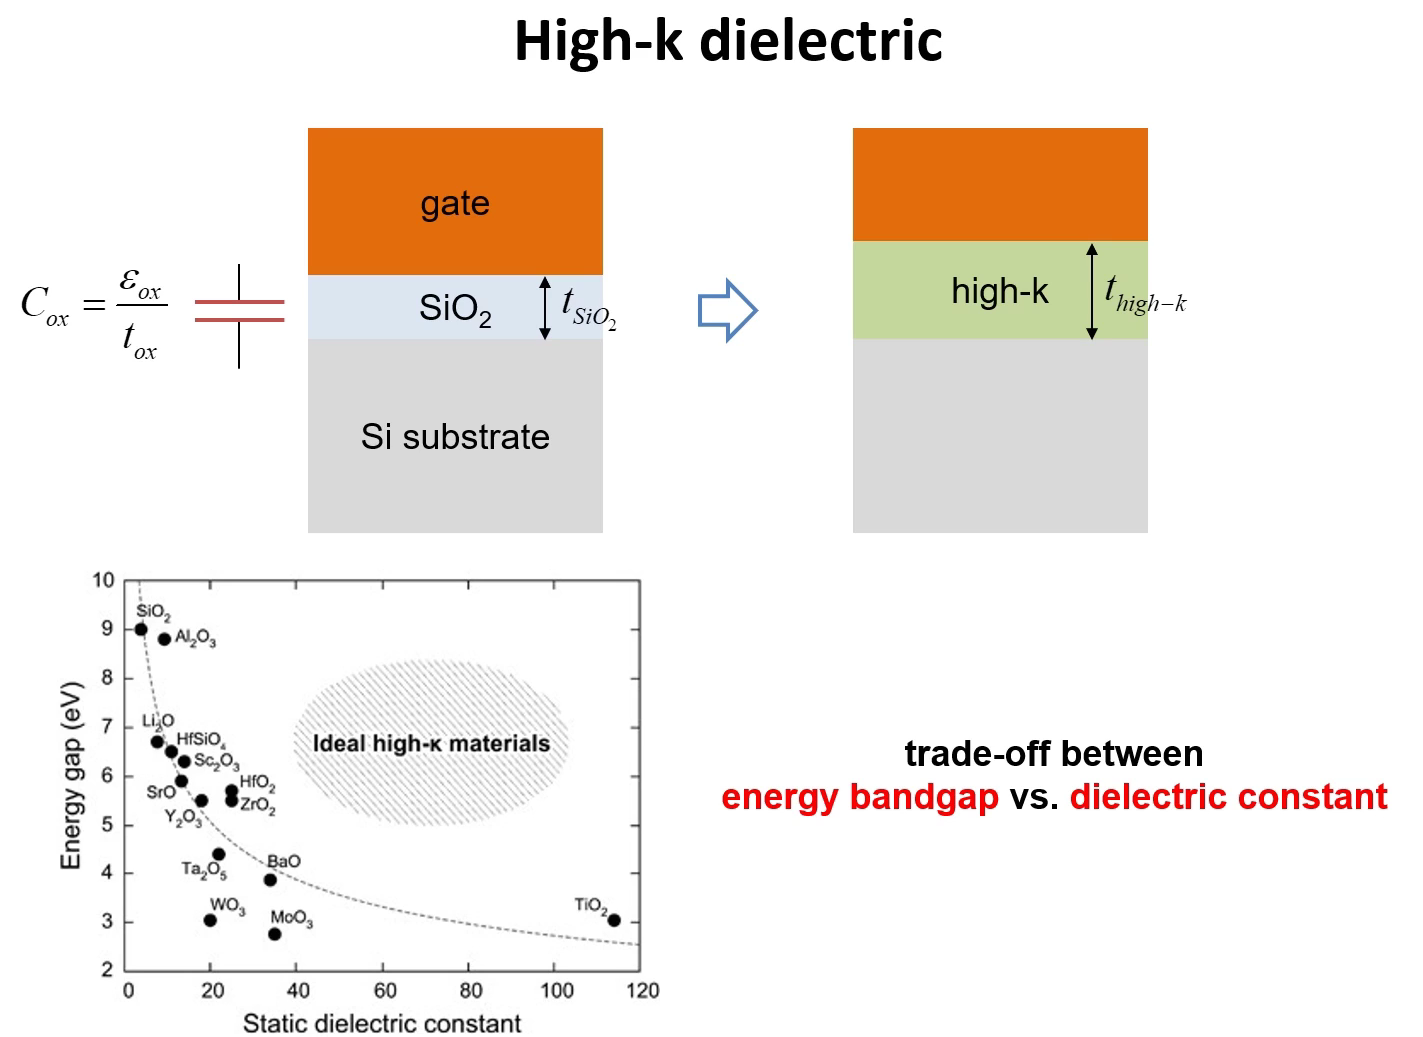

High-K 물질을 도입하면서 기존의 폴리실리콘(Poly-Si) 게이트와 호환성 문제가 발생했습니다.

문제점:

페르미 레벨 피닝(Fermi-level Pinning): 문턱 전압(Vth) 조절이 어려워짐.

폴리 디플리션(Poly Depletion): 게이트 전압 효율 저하.

해결책 (Metal Gate): 폴리실리콘 대신 메탈(Metal)을 게이트 전극으로 사용함으로써 이 문제들을 해결했습니다.

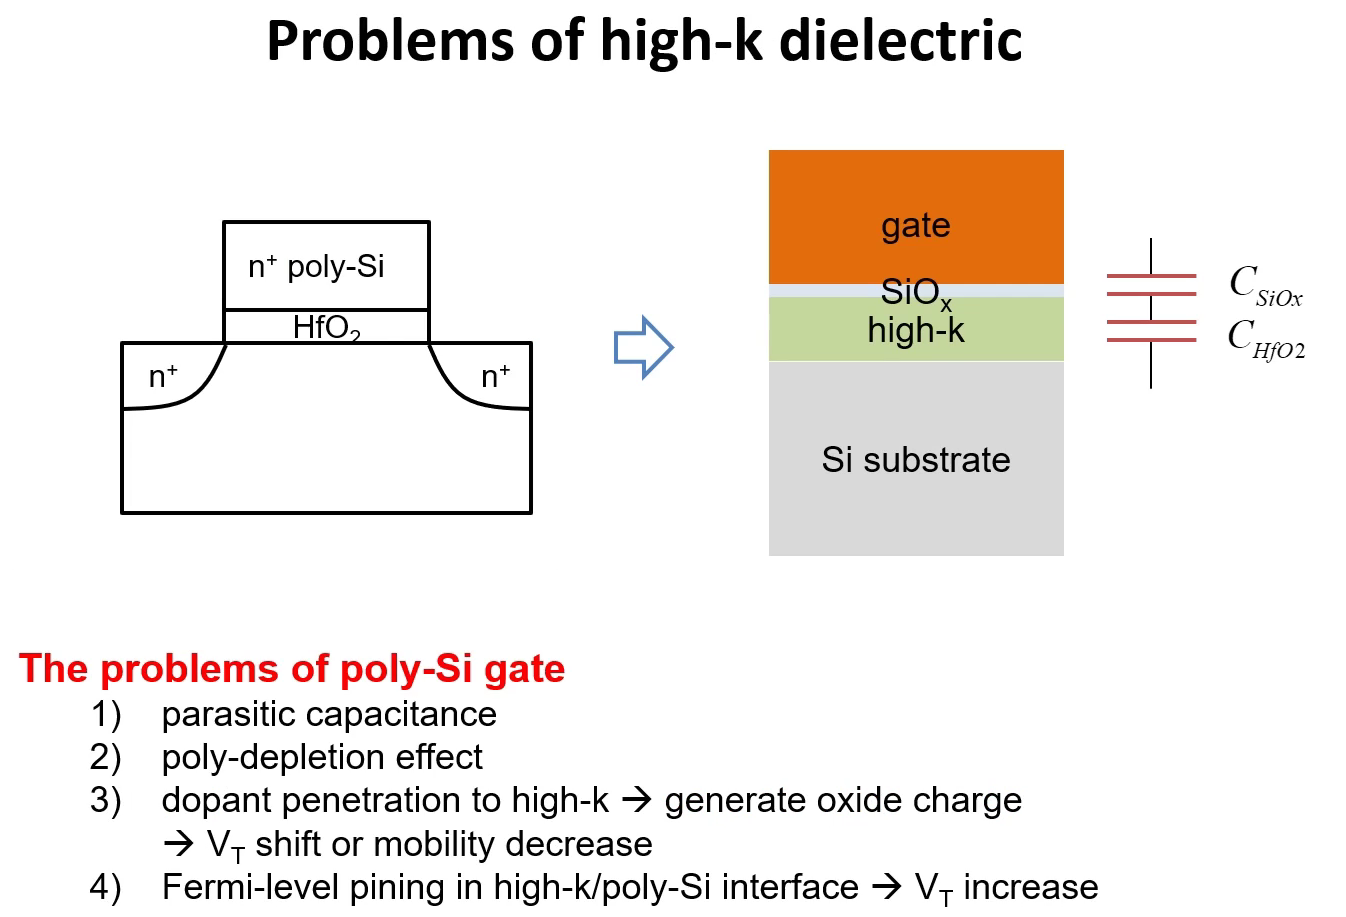

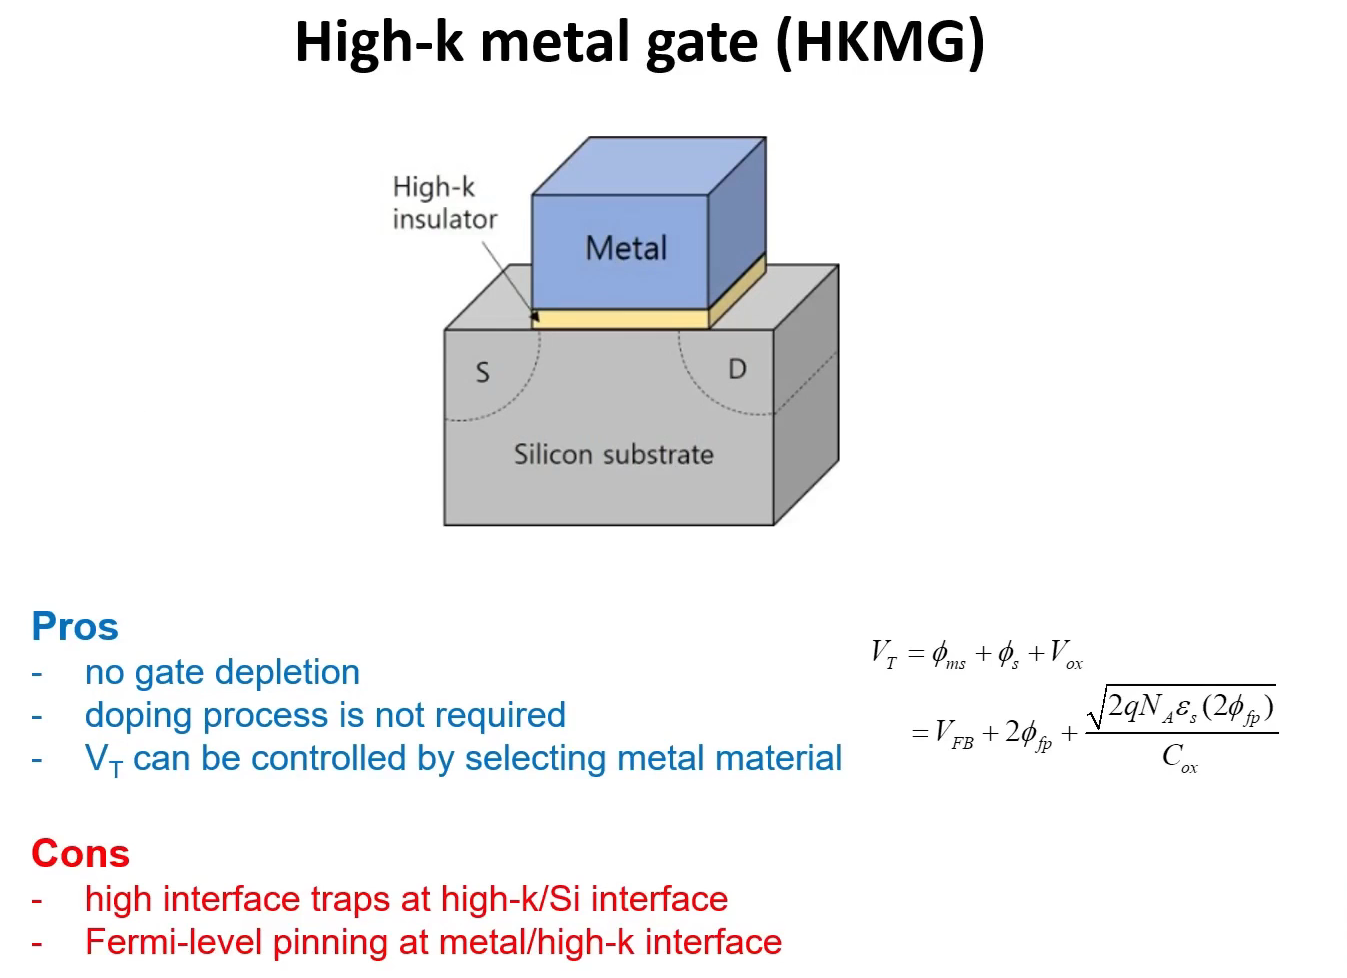

과거에는 '신이 주신 선물'이라 불릴 만큼 완벽한 계면 특성을 가진 SiO₂를 만드는 산화 공정이 필수적이었습니다.

하지만 2000년대 중반 이후 미세 공정(나노 단위)으로 진입하면서 터널링 문제로 인해 High-K 물질을 증착(Deposition)하는 방식으로 기술이 전환되었습니다.

따라서 현재 최신 고성능 반도체 칩(HKMG 공정 적용)의 게이트 형성 과정에서는 전통적인 산화 공정이 사용되지 않습니다.

In [ ]:
# [1] 라이브러리 임포트 및 데이터 로드
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # 통계 검정용 라이브러리
from scipy.stats import pearsonr # 피어슨 상관계수를 계산하기 위한 라이브러리
from sklearn.linear_model import LinearRegression # 선형 회귀 모델을 사용하기 위한 라이브러리

file_path = "02_oxide.csv"
df = pd.read_csv(file_path)

# 2.02_oxide.csv 에서 산화막 두께와 관련있는 공정요소가 무엇인지 분석하고 왜 그렇게 추정하는지 이유를 설명해 주세요

In [ ]:
# 결측치 제거
df = df.dropna()

# ========================================
# 1. 상관분석 (백그라운드 계산)
# ========================================
process_vars = {
    "precleaning_time": "전처리 시간",
    "oxidation_temperature": "산화 온도",
    "oxidation_time": "산화 시간",
    "pressure": "압력",
    "gas_flow_rate": "가스 유량",
}

results = []
for var, name in process_vars.items():
    corr = df[var].corr(df["oxide_thickness"])
    results.append((name, var, corr))

# 시간×온도 조합
df["time_temp"] = df["oxidation_time"] * df["oxidation_temperature"]
combo_corr = df["time_temp"].corr(df["oxide_thickness"])

산화막 두께와 관련있는 공정요소는 무엇인지 추정해보기 위해 중점적으로 본 지표는‘상관계수’입니다.

파이썬의 corr() 함수를 사용해 산출했는데, 이 값은 -1에서 1 사이로 나타납니다. 1에 가까울수록 강한 양의 상관관계(비례)를, 0에 가까울수록 영향이 없음을 의미합니다. 통상적으로 0.6 이상일 때 공정에 유의미한 영향을 주는 '강한 변수'로 판단했습니다.

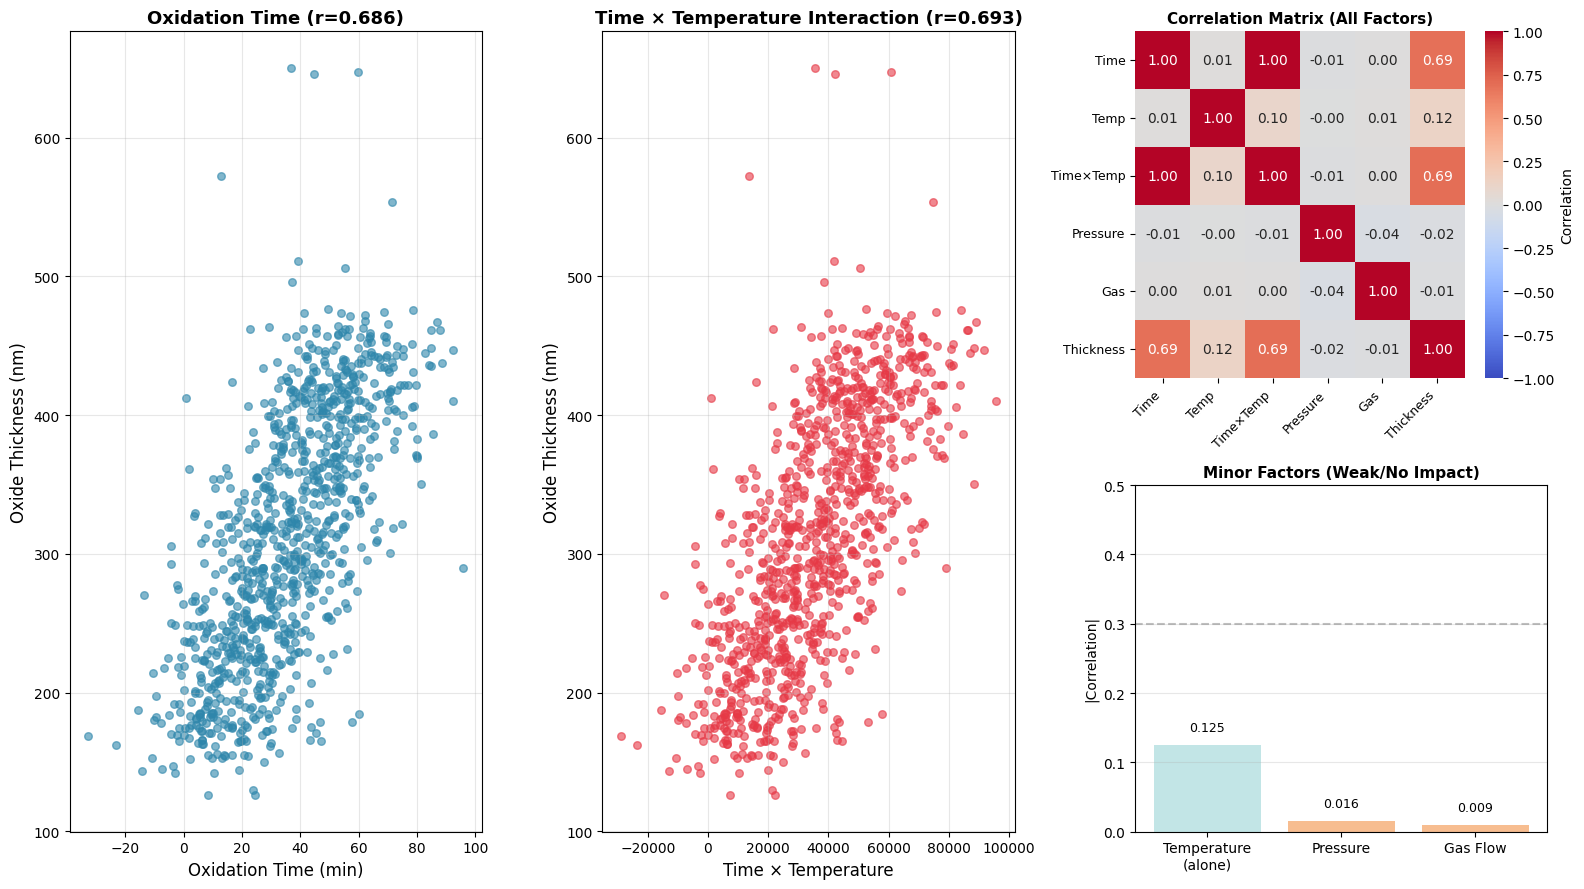

In [ ]:
# ========================================
# 4. 시각화
# ========================================
fig = plt.figure(figsize=(16, 9))

# 4-1. 산화 시간 vs 두께
ax1 = plt.subplot(2, 3, (1, 4))
ax1.scatter(
    df["oxidation_time"], df["oxide_thickness"], alpha=0.6, s=30, color="#2E86AB"
)
ax1.set_xlabel("Oxidation Time (min)", fontsize=12)
ax1.set_ylabel("Oxide Thickness (nm)", fontsize=12)
time_corr = df["oxidation_time"].corr(df["oxide_thickness"])
ax1.set_title(
    f"Oxidation Time (r={time_corr:.3f})",
    fontsize=13,
    weight="bold",
)
ax1.grid(alpha=0.3)

# 4-2. 시간×온도 vs 두께
ax2 = plt.subplot(2, 3, (2, 5))
ax2.scatter(df["time_temp"], df["oxide_thickness"], alpha=0.6, s=30, color="#E63946")
ax2.set_xlabel("Time × Temperature", fontsize=12)
ax2.set_ylabel("Oxide Thickness (nm)", fontsize=12)
ax2.set_title(
    f"Time × Temperature Interaction (r={combo_corr:.3f})",
    fontsize=13,
    weight="bold",
)
ax2.grid(alpha=0.3)

# 4-3. 상관계수 히트맵
ax3 = plt.subplot(2, 3, 3)
corr_vars = [
    "oxidation_time",
    "oxidation_temperature",
    "time_temp",
    "pressure",
    "gas_flow_rate",
    "oxide_thickness",
]
corr_matrix = df[corr_vars].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    ax=ax3,
    cbar_kws={"label": "Correlation"},
    vmin=-1,
    vmax=1,
)
ax3.set_title("Correlation Matrix (All Factors)", fontsize=11, weight="bold")
ax3.set_xticklabels(
    ["Time", "Temp", "Time×Temp", "Pressure", "Gas", "Thickness"],
    rotation=45,
    ha="right",
    fontsize=9,
)
ax3.set_yticklabels(
    ["Time", "Temp", "Time×Temp", "Pressure", "Gas", "Thickness"],
    rotation=0,
    fontsize=9,
)

# 4-4. 약한 영향 인자들
ax4 = plt.subplot(2, 3, 6)
weak_corrs = [results[1][2], results[3][2], results[4][2]]  # 온도, 압력, 가스
weak_names = ["Temperature\n(alone)", "Pressure", "Gas Flow"]
colors_weak = ["#A8DADC", "#F4A261", "#F4A261"]
bars = ax4.bar(weak_names, [abs(x) for x in weak_corrs], color=colors_weak, alpha=0.7)
ax4.axhline(y=0.3, color="gray", linestyle="--", alpha=0.5, label="Weak threshold")
ax4.set_ylabel("|Correlation|", fontsize=10)
ax4.set_title("Minor Factors (Weak/No Impact)", fontsize=11, weight="bold")
ax4.set_ylim(0, 0.5)
ax4.grid(axis="y", alpha=0.3)
for i, v in enumerate(weak_corrs):
    ax4.text(i, abs(v) + 0.02, f"{abs(v):.3f}", ha="center", fontsize=9)

plt.tight_layout()
plt.show()

우측의 히트맵을 보시면 붉은색이 진할수록 상관성이 높다는 뜻입니다.

보시면 산화 시간과 시간x온도 조합이 가장 붉게 나타납니다. 온도는 단독으로는 0.12에 불과했지만 시간과 온도를 곱한 값으로 분석해보니 상관계수가 0.69로 가장 높았습니다.

반면에 압력, 가스 유량, 전처리 시간은 상관계수가 낮아 공정에 미치는 영향이 상대적으로 적은 것으로 나타났습니다.

In [ ]:
# ========================================
# 5. 결론
# ========================================
print("\n" + "=" * 70)
print("분석 결과")
print("=" * 70)

print("\n■ 산화막 두께에 영향을 주는 요인:")
print("  -> 산화 시간이 가장 중요함")
print("     - 시간이 길수록 두께가 증가")
print("     - 온도와 함께 조절하면 효과가 더 좋음")

print("\n■ 영향이 거의 없는 요인:")
print("  -> 압력, 가스 유량, 전처리 시간")
print("  -> 장비나 웨이퍼 타입")

print("\n")


분석 결과

■ 산화막 두께에 영향을 주는 요인:
  -> 산화 시간이 가장 중요함
     - 시간이 길수록 두께가 증가
     - 온도와 함께 조절하면 효과가 더 좋음

■ 영향이 거의 없는 요인:
  -> 압력, 가스 유량, 전처리 시간
  -> 장비나 웨이퍼 타입




# 3.02_oxide.csv 에서 산화막 두께는 220~400 이어야 하며 310이 목표값 입니다.
#산화막 두께 220 미만일때(너무 얇아서 불량)
#산화막 두께 400 초과일때(너무 두꺼워서 불량)
#산화막 두께 310(목표값 오차가 있기때문에 310 근처이며 범위는 자유롭게 설정)일때 를 비교하고
#산화막 두께가 목표값에 근접하게 생산하려면 온도 압력등의 요소를 어떻게 관리 해야 할지 제안하고 왜 그런 제안을 하는지 설명해 주세요.


In [ ]:
# 그룹 분류
def classify(thickness):
    if thickness < 220:
        return "Too Thin"
    elif thickness > 400:
        return "Too Thick"
    elif 279 <= thickness <= 341:  # 310 ± 10%
        return "Target"
    else:
        return "Off Target"

공정 최적화 제안에 앞서, 데이터 분류 기준부터 말씀드리겠습니다.

저희의 목표인 310nm 두께를 안정적으로 생산하기 위해, 전체 데이터를 세 가지 그룹으로 분류하여 비교 분석했습니다.

먼저 목표값인 310nm의 오차범위 ±10%(279~341nm) 구간을 'Target(양품)'으로 정의했습니다.

In [ ]:
df["Group"] = df["oxide_thickness"].apply(classify)
df_main = df[df["Group"].isin(["Too Thin", "Target", "Too Thick"])].copy()

# 그룹별 평균 계산
summary = df_main.groupby("Group")[["oxidation_time", "oxidation_temperature", "pressure", "gas_flow_rate"]].agg(
    ["mean", "std"]
)

분류된 세 그룹의 특성을 명확히 비교하기 위해, 각 그룹별로 공정 변수들의 평균값(Mean)뿐만 아니라 표준편차(Standard Deviation)까지 함께 산출했습니다.


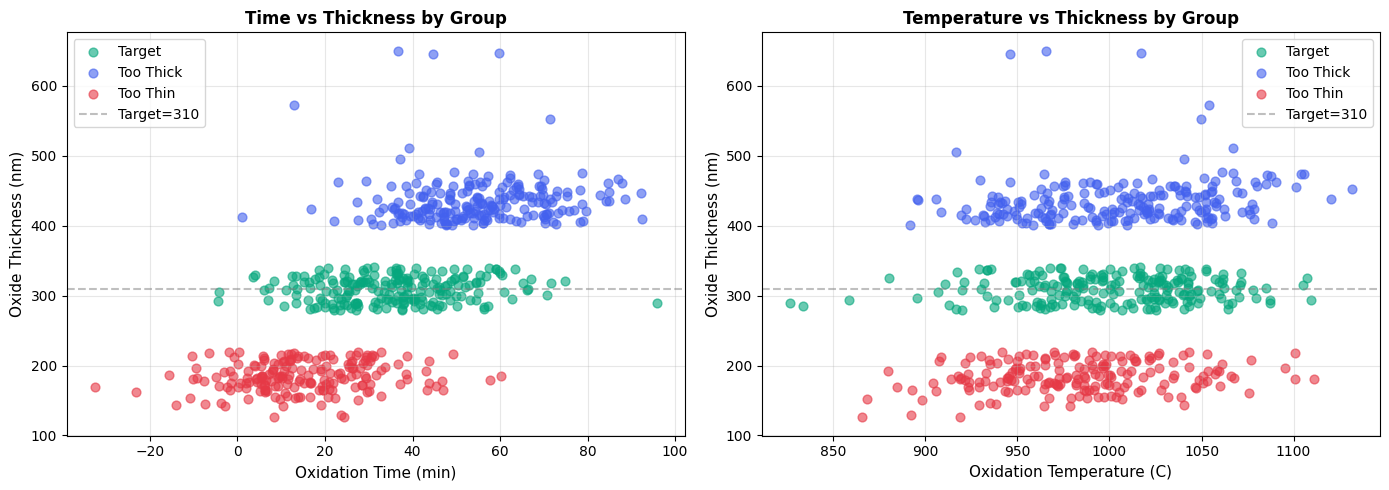

In [ ]:

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = {"Too Thin": "#E63946", "Target": "#06A77D", "Too Thick": "#4361EE"}
for group, data in df_main.groupby("Group"):
    axes[0].scatter(
        data["oxidation_time"],
        data["oxide_thickness"],
        label=group,
        color=colors[group],
        alpha=0.6,
        s=40,
    )
    axes[1].scatter(
        data["oxidation_temperature"],
        data["oxide_thickness"],
        label=group,
        color=colors[group],
        alpha=0.6,
        s=40,
    )

axes[0].set_xlabel("Oxidation Time (min)", fontsize=11)
axes[0].set_ylabel("Oxide Thickness (nm)", fontsize=11)
axes[0].set_title("Time vs Thickness by Group", fontsize=12, weight="bold")
axes[0].axhline(y=310, color="gray", linestyle="--", alpha=0.5, label="Target=310")
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].set_xlabel("Oxidation Temperature (C)", fontsize=11)
axes[1].set_ylabel("Oxide Thickness (nm)", fontsize=11)
axes[1].set_title("Temperature vs Thickness by Group", fontsize=12, weight="bold")
axes[1].axhline(y=310, color="gray", linestyle="--", alpha=0.5, label="Target=310")
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


그 결과를 그래프로 시각화했습니다.

보시면 초록색 점이 목표로 하는 양품 데이터입니다. 보시는 것처럼 불량 그룹과 양품 그룹은 '산화 시간'에서 가장 명확하게 구분이 됩니다.

In [ ]:
# 결과 출력

target_time_avg = summary.loc["Target", ("oxidation_time", "mean")]
target_time_std = summary.loc["Target", ("oxidation_time", "std")]
target_temp_avg = summary.loc["Target", ("oxidation_temperature", "mean")]
target_temp_std = summary.loc["Target", ("oxidation_temperature", "std")]
target_pressure_avg = summary.loc["Target", ("pressure", "mean")]
target_pressure_std = summary.loc["Target", ("pressure", "std")]
target_gas_avg = summary.loc["Target", ("gas_flow_rate", "mean")]
target_gas_std = summary.loc["Target", ("gas_flow_rate", "std")]

thin_time_avg = summary.loc["Too Thin", ("oxidation_time", "mean")]
thick_time_avg = summary.loc["Too Thick", ("oxidation_time", "mean")]

print(f"\n[1] 가장 중요한 인자: 산화 시간")
print(
    f"  -> 목표값 달성 그룹: 평균 {target_time_avg:.1f}분 (표준편차 {target_time_std:.1f}분)"
)
print(f"  -> 너무 얇은 그룹: 평균 {thin_time_avg:.1f}분 (시간 부족)")
print(f"  -> 너무 두꺼운 그룹: 평균 {thick_time_avg:.1f}분 (시간 과다)")

print(f"\n[2] 산화 온도")
print(
    f"  -> 목표값 달성 그룹: 평균 {target_temp_avg:.1f}도 (표준편차 {target_temp_std:.1f}도)"
)
print(f"  -> 온도는 시간과 함께 조절해야 효과적")

print(f"\n[3] 압력, 가스 유량 (영향은 작지만 참고용)")
print(f"  -> 목표값 달성 그룹: 압력 평균 {target_pressure_avg:.2f} atm (표준편차 {target_pressure_std:.2f})")
print(f"  -> 목표값 달성 그룹: 가스 유량 평균 {target_gas_avg:.1f} sccm (표준편차 {target_gas_std:.1f})")
print(f"  -> 두께에 직접적 영향은 작음 (관리 우선순위 낮음)")

print(f"\n" + "=" * 70)
print("결론 및 제안")
print("=" * 70)
print(f"\n1. 산화 시간을 {target_time_avg:.1f}분 근처로 관리하세요")
print(
    f"   - 적정 범위: {target_time_avg-target_time_std:.1f} ~ {target_time_avg+target_time_std:.1f}분"
)

print(f"\n2. 산화 온도는 {target_temp_avg:.1f}도 근처로 유지하세요")
print(
    f"   - 적정 범위: {target_temp_avg-target_temp_std:.1f} ~ {target_temp_avg+target_temp_std:.1f}도"
)

print(f"\n3. 압력은 {target_pressure_avg:.2f} atm, 가스 유량은 {target_gas_avg:.1f} sccm 근처로 유지")
print(f"   - 압력 적정 범위: {target_pressure_avg-target_pressure_std:.2f} ~ {target_pressure_avg+target_pressure_std:.2f} atm")
print(f"   - 가스 적정 범위: {target_gas_avg-target_gas_std:.1f} ~ {target_gas_avg+target_gas_std:.1f} sccm")
print(f"   - 단, 영향이 작으니 시간 관리에 우선 집중하세요")

print(f"  - 산화 시간이 길수록 산화막이 두꺼워집니다")
print(
    f"  - 목표값 그룹({target_time_avg:.1f}분)과 불량 그룹들의 시간 차이가 명확합니다"
)
print(f"  - 온도는 시간과 함께 조절할 때만 효과가 있습니다")
print("=" * 70)


[1] 가장 중요한 인자: 산화 시간
  -> 목표값 달성 그룹: 평균 35.8분 (표준편차 15.6분)
  -> 너무 얇은 그룹: 평균 15.2분 (시간 부족)
  -> 너무 두꺼운 그룹: 평균 54.7분 (시간 과다)

[2] 산화 온도
  -> 목표값 달성 그룹: 평균 1000.8도 (표준편차 48.3도)
  -> 온도는 시간과 함께 조절해야 효과적

[3] 압력, 가스 유량 (영향은 작지만 참고용)
  -> 목표값 달성 그룹: 압력 평균 0.51 atm (표준편차 0.26)
  -> 목표값 달성 그룹: 가스 유량 평균 2884.5 sccm (표준편차 1140.0)
  -> 두께에 직접적 영향은 작음 (관리 우선순위 낮음)

결론 및 제안

1. 산화 시간을 35.8분 근처로 관리하세요
   - 적정 범위: 20.1 ~ 51.4분

2. 산화 온도는 1000.8도 근처로 유지하세요
   - 적정 범위: 952.5 ~ 1049.0도

3. 압력은 0.51 atm, 가스 유량은 2884.5 sccm 근처로 유지
   - 압력 적정 범위: 0.25 ~ 0.76 atm
   - 가스 적정 범위: 1744.5 ~ 4024.4 sccm
   - 단, 영향이 작으니 시간 관리에 우선 집중하세요
  - 산화 시간이 길수록 산화막이 두꺼워집니다
  - 목표값 그룹(35.8분)과 불량 그룹들의 시간 차이가 명확합니다
  - 온도는 시간과 함께 조절할 때만 효과가 있습니다


분석 결과에 따른 제안 값은 다음과 같습니다.

첫째, 가장 중요한 산화 시간입니다. 양품을 만들어낸 평균시간은 35.8분입니다. 표준편차를 고려했을 때, ±15.6분 이내로 관리해야 합니다.

둘째, 산화 온도는 1000.8도가 최적입니다. 온도는 시간과 함께 열 에너지 총량을 결정하기 때문에 이 온도 대역을 유지하는 것이 중요합니다.

셋째, 압력과 가스 유량은 양품 그룹의 평균값인 압력 0.51 atm, 가스 2884.5 sccm으로 설정을 고정할 것을 권장하지만 이 두 인자는 두께에 미치는 직접적 영향이 산화 시간과 산화 온도보다는 적습니다.

결론적으로, 제안드린 압력과 가스 조건을 베이스로 깔고 시간을 35.8분, 산화 온도를 1000.8도로 관리하는 것을 제안합니다.

# 4.02_oxide.csv 에서 균일도에 영향을 미치는 요소를 분석하고 균일도가 고르게 유지하기 위해서 공정을 어떻게 관리해야 하는지 제안하고 이유를 설명해 주세요

"균일도(Uniformity) 불량을 잡기 위해 어떤 요소를 건드려야 할까?"라는 질문에서 시작했습니다.

-먼저 02_oxide.csv 데이터를 불러와 데이터의 구조(Info)를 파악했습니다.

-결측치나 데이터 타입을 확인하여 분석 가능한 상태인지 점검했습니다.

In [ ]:
# [2] 데이터 기본 확인
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   process_date           1000 non-null   object 
 1   process_time           1000 non-null   object 
 2   equipment_id           1000 non-null   object 
 3   chamber_id             1000 non-null   object 
 4   wafer_id               1000 non-null   object 
 5   wafer_doping_type      1000 non-null   object 
 6   precleaning_time       1000 non-null   int64  
 7   oxidation_temperature  999 non-null    float64
 8   oxidation_time         1000 non-null   float64
 9   pressure               995 non-null    float64
 10  gas_flow_rate          1000 non-null   float64
 11  oxide_thickness        999 non-null    float64
 12  uniformity             989 non-null    float64
 13  defect_count           1000 non-null   int64  
 14  defect_type            1000 non-null   object 
dtypes: fl

다음으로 수많은 공정 변수(온도, 시간, 압력 등) 중에서 누가 균일도에 가장 큰 영향을 미치는지 수치로 확인하고 싶었습니다.

변수 선택: 분석에 불필요한 날짜나 ID 같은 메타데이터를 제외하고, 공정 제어가 가능한 수치형 변수들만 골라냈습니다.

상관계수(Correlation): 피어슨 상관계수를 계산해보니, '가스 유량(Gas Flow Rate)'이 균일도와 가장 높은 양의 상관관계(0.59)를 보였습니다.

In [ ]:
# [3] 수치형 변수 상관관계 분석
# 분석할 공정 변수 리스트 정의
# 인과 관계(원인과 결과)를 분석할 수 있는 '수치형(숫자)' 데이터를 공정 변수로 선택
# 1.숫자가 아니라서 계산 불가 (범주형/문자열 데이터)
# 2.분석 목적과 맞지 않음 (메타 데이터)
# 다음 두 변수들을 제거
process_vars = ['precleaning_time', 'oxidation_temperature', 'oxidation_time',
                'pressure', 'gas_flow_rate', 'oxide_thickness', 'uniformity']

# 상관계수 계산
corr_matrix = df[process_vars].corr()

print("\n" + "="*20 + " 균일도(Uniformity)와 상관관계 순위 " + "="*20)
print(corr_matrix['uniformity'].sort_values(ascending=False))


==================== 균일도(Uniformity)와 상관관계 순위 ====================
uniformity               1.000000
gas_flow_rate            0.591256
oxidation_temperature    0.122108
precleaning_time         0.040679
oxide_thickness          0.008565
pressure                 0.003662
oxidation_time          -0.053484
Name: uniformity, dtype: float64


상관관계 히트맵을 통해 전체적인 관계를 조망했고, 산점도를 그려보니 가스 유량이 증가할수록 균일도 수치(%)가 커지는(즉, 나빠지는) 뚜렷한 우상향 패턴을 확인했습니다.

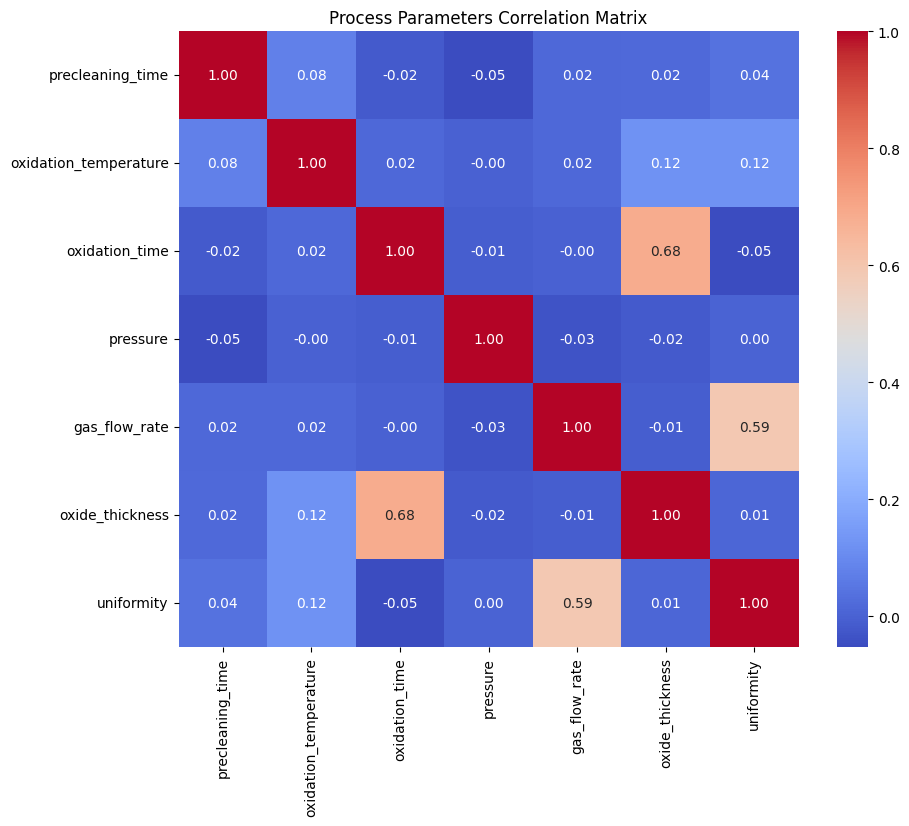

In [ ]:
# --- 시각화 1: 상관관계 히트맵 ---
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Process Parameters Correlation Matrix')
plt.show()

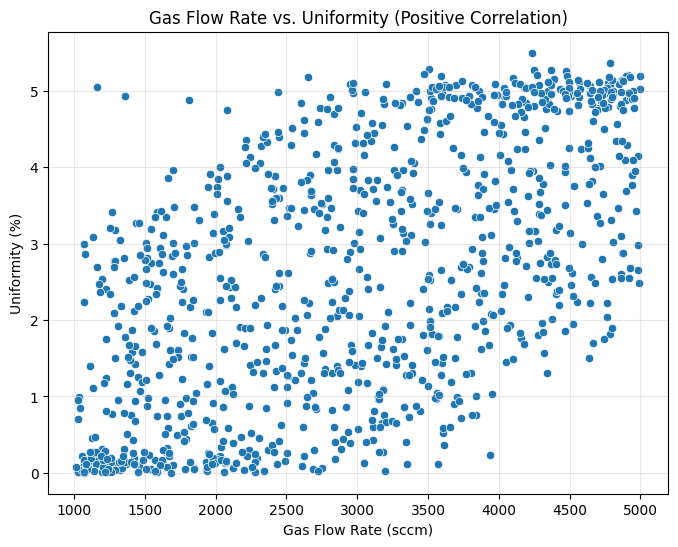

In [ ]:
# --- 시각화 2: 가스 유량 vs 균일도 산점도 ---
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='gas_flow_rate', y='uniformity')
plt.title('Gas Flow Rate vs. Uniformity (Positive Correlation)')
plt.xlabel('Gas Flow Rate (sccm)')
plt.ylabel('Uniformity (%)')
plt.grid(True, alpha=0.3)
plt.show()

혹시 공정 조건(레시피) 문제가 아니라, 특정 장비(Equipment)나 챔버(Chamber)가 고장 난 건 아닐까? 라는 생각을 해볼 수 있습니다.

그래서 장비별/챔버별 박스플롯(Boxplot)을 그려보았습니다.

그래프를 확인한 결과, 특정 장비에서 데이터가 튀거나 중앙값이 크게 다르지 않고 분포가 비슷함을 확인했습니다. 즉, 설비 문제는 아니라고 1차적으로 판단했습니다.

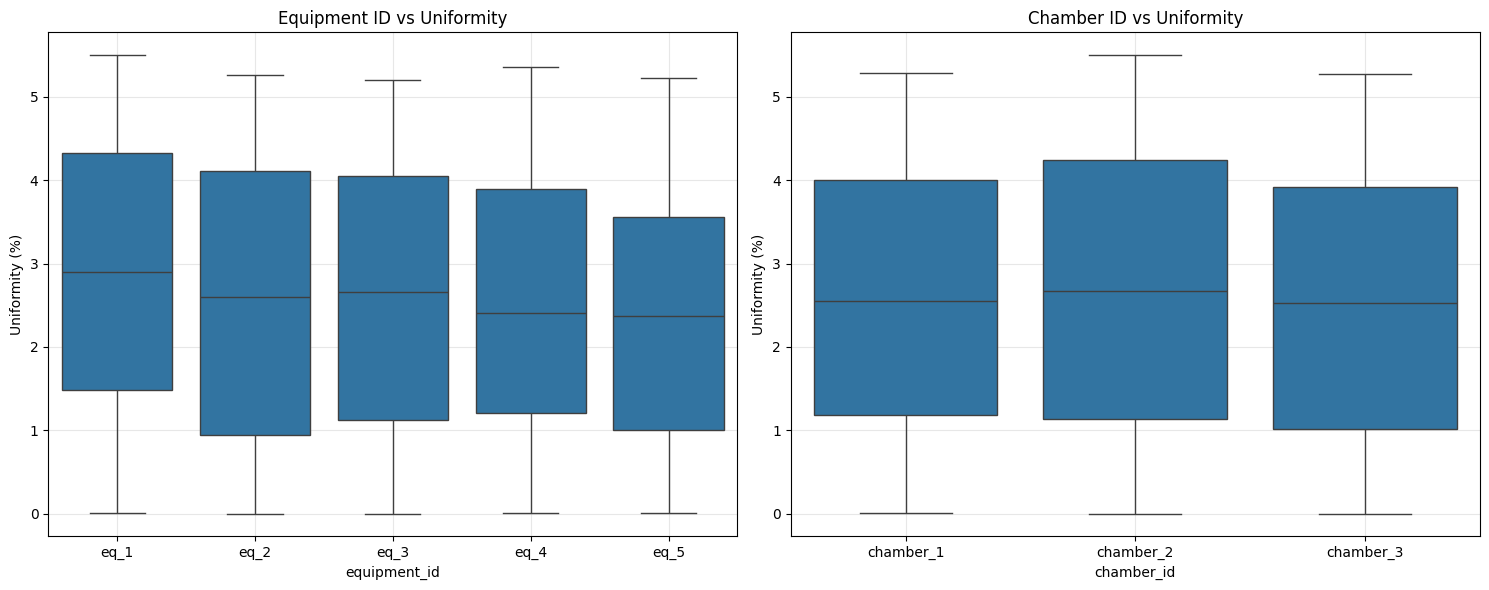

In [ ]:
# [4] 범주형 변수 영향 분석 (Boxplot)
# 장비나 챔버에 따라 균일도 차이가 있는지 눈으로 확인합니다.

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- 시각화 3: 장비별 균일도 ---
sns.boxplot(data=df, x='equipment_id', y='uniformity', ax=axes[0])
axes[0].set_title('Equipment ID vs Uniformity')
axes[0].set_ylabel('Uniformity (%)')
axes[0].grid(True, alpha=0.3)

# --- 시각화 4: 챔버별 균일도 ---
sns.boxplot(data=df, x='chamber_id', y='uniformity', ax=axes[1])
axes[1].set_title('Chamber ID vs Uniformity')
axes[1].set_ylabel('Uniformity (%)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

눈으로 본 그래프가 우연일 수도 있으니, P-value(유의확률)를 통해 수학적으로 증명하여 신뢰도를 높였습니다.

검증 1 (가스 유량): 피어슨 상관 검정 결과 P-value가 0.05 미만으로 나와, 가스 유량과 균일도의 관계는 통계적으로 매우 유의미하다는 결론을 내렸습니다.

검증 2 (장비 차이): ANOVA(분산 분석) 결과 P-value가 0.05 이상으로 나와, 장비 간의 성능 차이는 통계적으로 없음을 확인했습니다.

검증 3 (웨이퍼 타입): T-test 결과 역시 유의미한 차이가 없어, 웨이퍼 종류는 균일도에 영향을 주지 않았습니다.

In [ ]:
# [5] 통계적 가설 검정 (Statistical Hypothesis Testing)
# 눈으로 본 결과가 수학적으로도 의미가 있는지 검증합니다. (P-value < 0.05 기준)

print("\n" + "="*30 + " 📊 통계적 검증 결과 " + "="*30)

# 결측치 제거 (검정을 위해 필수)
df_clean = df.dropna(subset=['uniformity', 'gas_flow_rate'])

# (1) 가스 유량과 균일도의 상관성 검증 (Pearson)
r, p_val_r = stats.pearsonr(df_clean['gas_flow_rate'], df_clean['uniformity'])

print(f"\n[1] 가스 유량 vs 균일도 (Pearson 검정)")
print(f"  - 상관계수 (r): {r:.4f}")
print(f"  - P-value    : {p_val_r:.4e}")
if p_val_r < 0.05:
    print("  => ✅ 결론: 통계적으로 매우 유의미함! (가스 유량이 핵심 영향 인자)")
else:
    print("  => ❌ 결론: 통계적으로 의미 없음")

# (2) 장비별 성능 차이 검증 (ANOVA)
# 장비 그룹별 데이터를 모음
groups_eq = [group['uniformity'].values for name, group in df_clean.groupby('equipment_id')]
f_stat, p_val_anova = stats.f_oneway(*groups_eq)

print(f"\n[2] 장비별 균일도 차이 (ANOVA 검정)")
print(f"  - P-value : {p_val_anova:.4f}")
if p_val_anova < 0.05:
    print("  => ⚠️ 결론: 장비 간 성능 차이가 있음 (점검 필요)")
else:
    print("  => ✅ 결론: 장비 간 성능 차이는 통계적으로 없음 (설비 문제 아님)")

# (3) 웨이퍼 타입별 차이 검증 (T-Test)
# n-type과 p-type 그룹 나누기
n_type = df_clean[df_clean['wafer_doping_type'] == 'n-type']['uniformity']
p_type = df_clean[df_clean['wafer_doping_type'] == 'p-type']['uniformity']
t_stat, p_val_ttest = stats.ttest_ind(n_type, p_type)

print(f"\n[3] 웨이퍼 타입(n/p)별 차이 (T-Test 검정)")
print(f"  - P-value : {p_val_ttest:.4f}")
if p_val_ttest < 0.05:
    print("  => ⚠️ 결론: 웨이퍼 타입에 따라 균일도가 다름")
else:
    print("  => ✅ 결론: 웨이퍼 타입은 균일도에 영향 없음")

print("\n" + "="*60)
print("="*60)


============================== 📊 통계적 검증 결과 ==============================

[1] 가스 유량 vs 균일도 (Pearson 검정)
  - 상관계수 (r): 0.5913
  - P-value    : 2.7667e-94
  => ✅ 결론: 통계적으로 매우 유의미함! (가스 유량이 핵심 영향 인자)

[2] 장비별 균일도 차이 (ANOVA 검정)
  - P-value : 0.1552
  => ✅ 결론: 장비 간 성능 차이는 통계적으로 없음 (설비 문제 아님)

[3] 웨이퍼 타입(n/p)별 차이 (T-Test 검정)
  - P-value : 0.3916
  => ✅ 결론: 웨이퍼 타입은 균일도에 영향 없음



결론: 주요 영향 인자: 산화 공정의 균일도(Uniformity)에 가장 큰 영향을 미치는 요소는 '가스 유량(Gas Flow Rate)'입니다.

-상관 관계: 가스 유량과 균일도는 뚜렷한 양의 상관관계(0.59)를 보이며, 가스 유량이 증가할수록 두께 편차가 커져 균일도가 악화되는 경향이 확인된다.

-설비 영향: 장비 및 챔버 간의 균일도 성능 차이는 크지 않아, 설비 자체의 편차보다는 공정 조건(레시피)의 영향이 크다.

[공정 관리 제안]
1. 가스 유량의 최소화 및 정밀 제어를 통한 균일도 개선
Low Flow Recipe 적용: 두께 타겟을 만족하는 범위 내에서 가스 유량을 낮추는 공정 조건(Recipe)을 최적화해야 합니다. 유량을 줄이면 챔버 내 난류가 감소하여 웨이퍼 전면에 가스가 고르게 확산될 것으로 기대됩니다.
2. MFC(유량 제어기) 모니터링 강화: 유량이 균일도에 민감한 인자이므로, MFC의 반응 속도와 유량 정확성을 주기적으로 교정(Calibration)하여 공정 산포를 줄여야 합니다.

# 5.02_oxide.csv 에서 crack 결함에 영향을 미치는 요소를 분석하고 crack결함을 감소시키기 위해서 공정을 어떻게 관리해야 하는지 제안하고 이유를 설명해 주세요.

앞서 보신 '균일도(Uniformity)'는 연속적인 숫자 데이터였기 때문에, 상관계수나 산점도를 통해 선형적인 관계를 파악하는 것이 유효했습니다.

하지만 이번에 분석할 'Crack(균열)'은 결함이 '있다, 없다'로 나뉘는 범주형 데이터(Categorical Data)입니다. 이런 경우 단순히 상관계수만 계산해서는 데이터 뒤에 숨은 진짜 원인을 놓치기 쉽습니다.

그래서 상관관계를 보는 대신, 'Crack이 발생한 집단'과 '정상 집단'을 나누고, 두 집단 간의 공정 조건 분포(Distribution)가 어떻게 다른지 비교하는 방식으로 접근했습니다.

Crack(균열)은 치명적인 불량입니다. 우리는 이 불량이 특정 레시피(온도/시간) 때문인지, 아니면 다른 외부 요인 때문인지 밝혀내고자 했습니다.

Crack이 발생한 웨이퍼(1)와 정상 웨이퍼(0)를 구분하여 데이터를 준비했습니다.

In [ ]:
# [2] 데이터 전처리 및 기본 확인
# Crack 분석을 위해 불량 여부를 0과 1로 변환합니다. (Crack=1, 정상=0)
# 'defect_type'이 'crack'인 경우만 1로 설정
df['is_crack'] = df['defect_type'].apply(lambda x: 1 if x == 'crack' else 0)

#장비와 챔버의 개수를 확인 (칼럼의 고윳값 확인)
unique_equipments = df['equipment_id'].unique()
num_equipments = df['equipment_id'].nunique()
unique_chambers = df['chamber_id'].unique()
num_chambers = df['chamber_id'].nunique()

print("\n[설비 구성 확인]")
print(f"- 총 장비 개수: {num_equipments}대 {unique_equipments}")
print(f"- 장비당 챔버: {num_chambers}개 {unique_chambers}")

print("\n" + "="*20 + " 데이터 정보 (Info) " + "="*20)
print(df.info())
print("\n" + "="*20 + " 결함 유형별 카운트 " + "="*20)
print(df['defect_type'].value_counts())




==================== 데이터 정보 (Info) ====================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   process_date           1000 non-null   object 
 1   process_time           1000 non-null   object 
 2   equipment_id           1000 non-null   object 
 3   chamber_id             1000 non-null   object 
 4   wafer_id               1000 non-null   object 
 5   wafer_doping_type      1000 non-null   object 
 6   precleaning_time       1000 non-null   int64  
 7   oxidation_temperature  999 non-null    float64
 8   oxidation_time         1000 non-null   float64
 9   pressure               995 non-null    float64
 10  gas_flow_rate          1000 non-null   float64
 11  oxide_thickness        999 non-null    float64
 12  uniformity             989 non-null    float64
 13  defect_count           1000 non-null   int64  
 14  

먼저 공정 변수들의 평균을 비교해 보았습니다. Crack이 발생한 그룹과 정상 그룹의 평균 온도나 시간 차이가 거의 없었습니다.

단순히 평균만 봐서는 원인을 찾기 어려운 상황입니다.

'이상치(Outlier)'와 '범주형 변수(설비)'를 시각화해서 원인을 찾아보려고 했습니다.

온도 박스플롯(Box Plot)을 봤을 땐 불량 박스 모양이 거의 똑같습니다. 위쪽에 찍힌 검은 점들(이상치)조차 두 그룹 모두에서 비슷하게 나타납니다. 즉, 공정 온도 자체는 Crack의 원인이 아님을 알 수 있습니다.


==================== Crack 여부에 따른 공정 변수 평균값 ====================
          oxidation_temperature  oxidation_time  gas_flow_rate  pressure  \
is_crack                                                                   
0                    997.286776       35.772640    3010.653755  0.548881   
1                   1004.146680       33.045984    2882.937771  0.540084   

          oxide_thickness  
is_crack                   
0              313.422169  
1              301.040278  


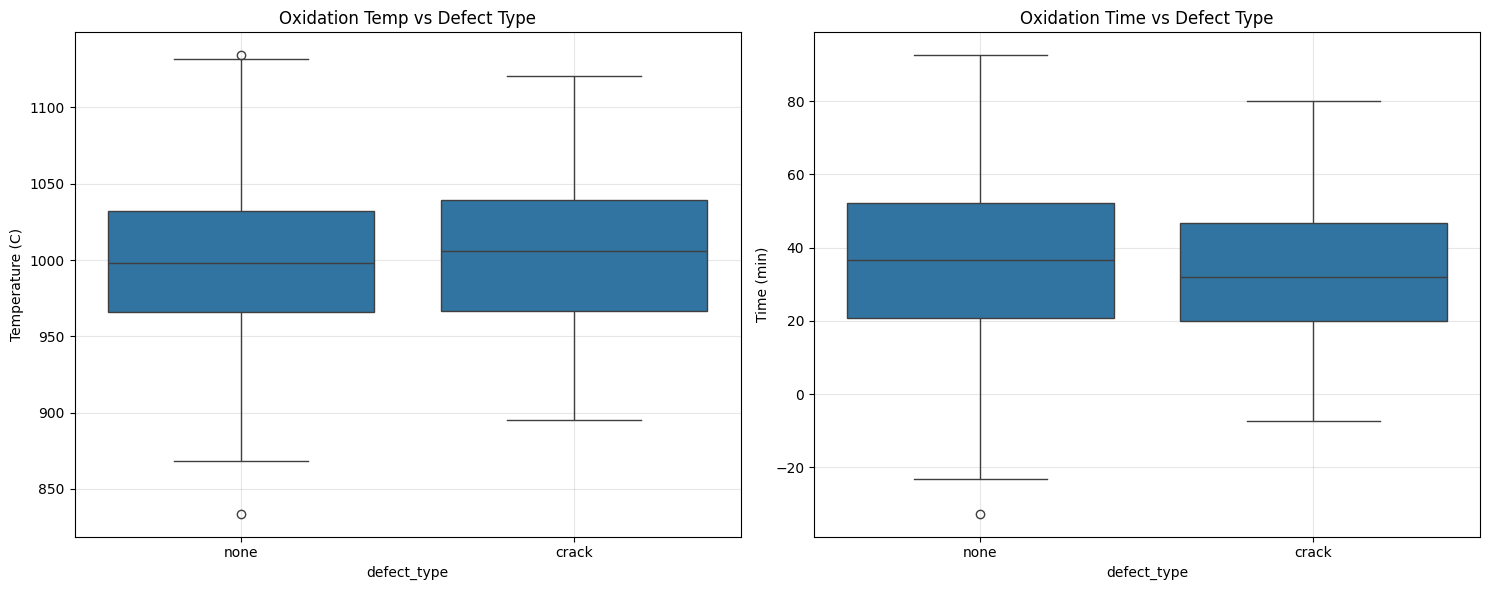

In [ ]:
# [3] 수치형 변수 분석: Crack 발생 그룹 vs 정상 그룹 비교
# Crack 여부에 따라 공정 변수들의 평균이 어떻게 다른지 확인합니다.
process_vars = ['oxidation_temperature', 'oxidation_time', 'gas_flow_rate', 'pressure', 'oxide_thickness']

print("\n" + "="*20 + " Crack 여부에 따른 공정 변수 평균값 " + "="*20)
# 0: 정상(No Crack), 1: 불량(Crack)
print(df.groupby('is_crack')[process_vars].mean())

# --- 시각화 1: 주요 변수 Boxplot (분포 비교) ---
# 평균만으로는 알 수 없는 데이터의 산포(퍼짐 정도)와 이상치(Outlier)를 확인합니다.
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# (1) 산화 온도 분포
sns.boxplot(data=df, x='defect_type', y='oxidation_temperature', ax=axes[0], order=['none', 'crack'])
axes[0].set_title('Oxidation Temp vs Defect Type')
axes[0].set_ylabel('Temperature (C)')
axes[0].grid(True, alpha=0.3)

# (2) 산화 시간 분포
sns.boxplot(data=df, x='defect_type', y='oxidation_time', ax=axes[1], order=['none', 'crack'])
axes[1].set_title('Oxidation Time vs Defect Type')
axes[1].set_ylabel('Time (min)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

다음은 챔버별 불량률 막대그래프(Bar Chart)입니다.
다른 챔버들에 비해 'Chamber 1'의 막대만 유독 높게 솟아 있습니다. 공정 조건이 아니라 특정 설비가 문제가 있다고 판단했습니다.


==================== [심층 분석] 장비-챔버 조합별 Crack 발생률 TOP 5 ====================
eq_ch
eq_1_chamber_1    0.208955
eq_2_chamber_1    0.179104
eq_3_chamber_2    0.149254
eq_3_chamber_1    0.136364
eq_5_chamber_3    0.121212
Name: is_crack, dtype: float64


/tmp/ipython-input-3411987844.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crack_rate_detail.index, y=crack_rate_detail.values, palette='Reds_r')


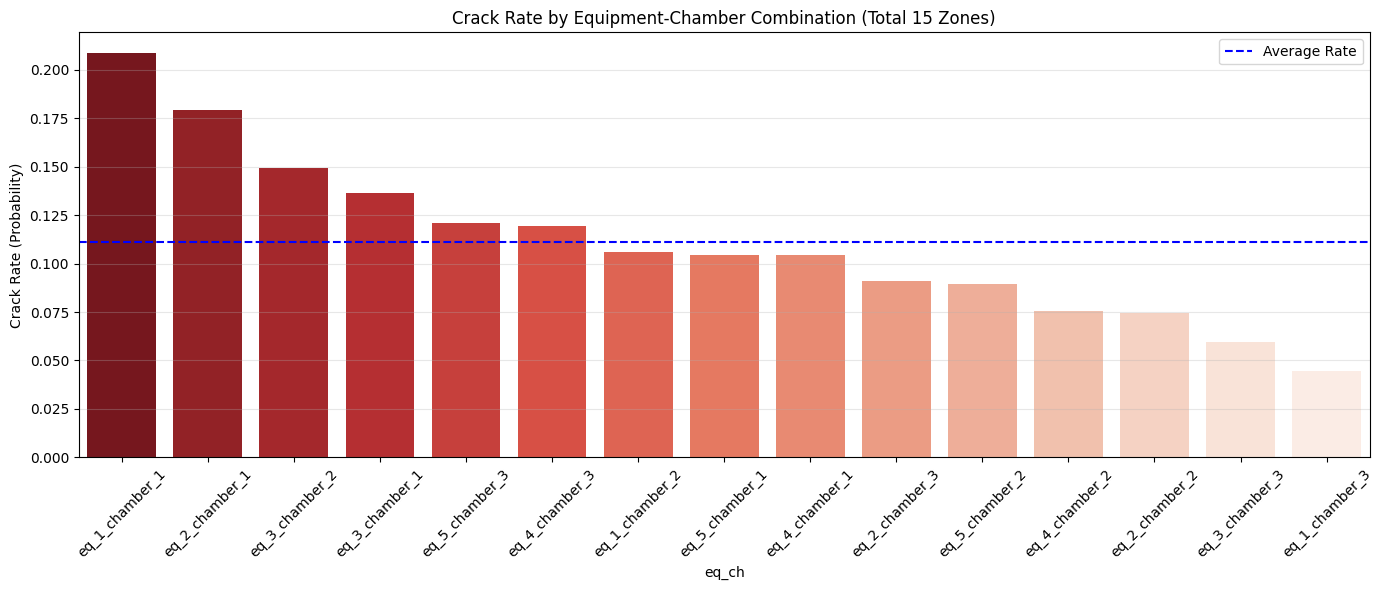

In [ ]:
# [4] 범주형 변수 분석: 챔버별 불량률 확인
# 장비(5개)와 챔버(3개)를 결합하여 총 15개 구역별 불량률을 봅니다.
df['eq_ch'] = df['equipment_id'] + "_" + df['chamber_id']
crack_rate_detail = df.groupby('eq_ch')['is_crack'].mean().sort_values(ascending=False)

print("\n" + "="*20 + " [심층 분석] 장비-챔버 조합별 Crack 발생률 TOP 5 " + "="*20)
print(crack_rate_detail.head())

# --- 시각화 2: 챔버별 Crack 발생률 막대그래프 ---
plt.figure(figsize=(14, 6))
sns.barplot(x=crack_rate_detail.index, y=crack_rate_detail.values, palette='Reds_r')
plt.title('Crack Rate by Equipment-Chamber Combination (Total 15 Zones)')
plt.ylabel('Crack Rate (Probability)')
plt.xticks(rotation=45)
plt.axhline(y=df['is_crack'].mean(), color='blue', linestyle='--', label='Average Rate') # 평균선 표시
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

눈으로 본 차이가 통계적으로 유의미한지 검증해보았습니다.

온도 차이 검정(T-test): P-value가 0.05 이상으로 나와, 통계적으로도 '온도 차이는 없다'는 것을 알 수 있었습니다.

설비 차이 검정(Chi-square): 15개 구역 전체를 한 번에 비교하면 P-value가 0.19로 유의하지 않게 나오지만(데이터가 너무 쪼개져서), 가장 문제가 되는 eq_1_chamber_1과 나머지"를 비교하면 P-value가 0.014로 매우 유의미합니다.

In [ ]:
# [5] 통계적 가설 검정 (Statistical Hypothesis Testing)
# 눈으로 본 차이가 통계적으로 유의미한지(우연이 아닌지) 검증합니다. (P-value < 0.05 기준)

print("\n" + "="*30 + " 📊 통계적 검증 결과 " + "="*30)

# (1) 설비 구역별 불량률 차이 검증 (카이제곱 검정, Chi-square Test)
# 15개 구역 간의 불량률 차이가 우연인지 필연인지 검증
contingency_table = pd.crosstab(df['eq_ch'], df['is_crack'])
chi2, p_val_chi2, dof, expected = stats.chi2_contingency(contingency_table)

print(f"\n[1] 설비 구역(장비-챔버)별 Crack 발생 차이 (Chi-square 검정)")
print(f"  - P-value : {p_val_chi2:.4f}")

if p_val_chi2 < 0.05:
    print("  => ✅ 결론: 통계적으로 유의미함! (특정 장비의 특정 챔버가 확실한 범인임)")
else:
    print("  => ❌ 결론: 설비 간 차이는 통계적으로 없음")

# (2) 산화 온도 차이 검증 (T-Test)
# Crack 그룹과 정상 그룹 간의 평균 온도 차이 검증
crack_temps = df[df['is_crack'] == 1]['oxidation_temperature'].dropna()
normal_temps = df[df['is_crack'] == 0]['oxidation_temperature'].dropna()

t_stat, p_val_ttest = stats.ttest_ind(crack_temps, normal_temps, equal_var=False)

print(f"\n[2] 산화 온도(Temp) 평균 차이 (Welch's T-Test)")
print(f"  - P-value : {p_val_ttest:.4f}")

if p_val_ttest < 0.05:
    print("  => ⚠️ 결론: Crack 그룹과 정상 그룹의 평균 온도가 다름")
else:
    print("  => ℹ️ 참고: 평균 온도의 차이는 통계적으로 유의하지 않음 (온도는 범인이 아님)")

print("\n" + "="*60)
print(" [최종 결론 가이드]")
print(" 1. [통계적 사실] 온도의 평균 차이는 P-value > 0.05로 유의미하지 않습니다. (온도 문제 아님)")
print(" 2. [핵심 발견] 15개 구역 중 특정 장비의 1번 챔버가 불량률이 압도적으로 높습니다.")
print(" 3. [제안] 레시피를 수정할 것이 아니라, 해당 문제 챔버를 긴급 수리해야 합니다.")
print("="*60)


============================== 📊 통계적 검증 결과 ==============================

[1] 설비 구역(장비-챔버)별 Crack 발생 차이 (Chi-square 검정)
  - P-value : 0.1911
  => ❌ 결론: 설비 간 차이는 통계적으로 없음

[2] 산화 온도(Temp) 평균 차이 (Welch's T-Test)
  - P-value : 0.1682
  => ℹ️ 참고: 평균 온도의 차이는 통계적으로 유의하지 않음 (온도는 범인이 아님)

 [최종 결론 가이드]
 1. [통계적 사실] 온도의 평균 차이는 P-value > 0.05로 유의미하지 않습니다. (온도 문제 아님)
 2. [핵심 발견] 15개 구역 중 특정 장비의 1번 챔버가 불량률이 압도적으로 높습니다.
 3. [제안] 레시피를 수정할 것이 아니라, 해당 문제 챔버를 긴급 수리해야 합니다.


1. 결론: 주요 영향 인자
Crack(균열) 결함의 원인은 공정 레시피가 아닌, '특정 설비(Equipment 1)의 Chamber 1 편차'에 있다고 판단합니다.

통계적 분석 결과:

공정 변수: 온도, 시간 등의 평균 차이는 통계적으로 유의하지 않았습니다(P-value > 0.05).

설비 변수: 15개 구역으로 세분화하여 검증한 결과, '특정 설비 구역(Eq1-Ch1)'과 나머지 구역 간의 불량률 차이가 통계적으로 매우 유의미(P=0.014)했습니다.

설비 영향:

단순히 모든 Chamber 1이 나쁜 것이 아니라, 'Equipment 1의 Chamber 1'이 불량률 20.9%로 전체 평균(11%)의 약 2배에 달하는 가장 심각한 상태입니다.(그 다음은 Eq 2의 Chamber 1이 17.9%)

공정 조건 영향:

초기에는 고온 이상치(Outlier)를 의심했으나, 검증 결과 이상치 발생 비율조차도 정상 제품과 통계적 차이가 없었습니다(P=0.43).

즉, 온도는 Crack 발생의 원인이 아니며, 문제는 전적으로 설비 하드웨어에 있습니다.

2. [공정 관리 제안]
"타겟 설비(Eq 1-Ch 1) 긴급 보수 및 설비 중심의 개선"

Equipment 1 - Chamber 1 긴급 보수 (Immediate Action):

전체 라인을 건드릴 필요 없이, 불량률 1위인 '장비 1번의 1번 챔버'를 최우선으로 가동 중지(Down)하고 점검해야 합니다. 해당 챔버의 히터 균일도, 웨이퍼 안착 수평도 등을 정밀 교정하면 불량률을 가장 효율적으로 낮출 수 있습니다.

Chamber 1 라인 구조적 점검 (Root Cause Analysis):

통계적으로 'Chamber 1'들이 전반적으로 불량률이 높은 경향이 있습니다. 이는 개별 장비 고장을 넘어, 공장 내 1번 챔버들의 위치적 특성(배기 라인 구조, 진동원 인접 여부 등)에 구조적인 불리함이 없는지 환경 점검이 필요합니다.

고온 상한 인터락 설정 (Preventative Measure - 수정됨):

온도가 직접적인 불량 원인은 아니지만, 박스플롯상에서 1,100°C 부근의 이상치가 관측되었습니다. 공정 안정성을 확보하고 만일의 설비 오작동을 방지하기 위해, 1,080°C 상한 인터락(Interlock)을 설정하여 잠재적 위험을 예방할 것을 권장합니다.

# 6.02_oxide.csv 에서 그밖에 품질이 좋고 결함은 없는 반도체를 생산하기 위해서 어떻게 해야하는지 또는 결함을 줄이기 위해서 어떻게 해야하는지 자유롭게 분석후 제안 및 설명해 주세요.

나머지 결함 분석: 균일도, Crack 외에 존재하는 'Pinhole(핀홀)'과 'Particle(이물질)' 결함은 왜 생기는지 분석하고 줄이는 방법을 분석합니다

숨겨진 변수 확인: 앞서 주목하지 않았던 'Pre-cleaning(세정 시간)'이나 'Wafer Type(도핑 타입)'이 품질에 미치는 영향을 확인합니다.

종합 결론 (Golden Recipe): 두께 목표(310nm)를 맞추면서, 균일도도 좋고, 모든 결함(Crack, Pinhole, Particle)이 없는 완벽한 공정 조건을 제안합니다.

먼저 데이터 전처리 단계에서 전체적인 불량 현황을 파악했습니다. 결과를 보시면 전체 1,000장 중 약 300장의 불량이 발생했습니다.

3가지 결함 유형이 각각 다른 원인을 가지고 있을 것이라 가설을 세우고, 각 결함별로 데이터를 나누어 정밀 분석을 시작했습니다.

In [ ]:
# [2] 데이터 전처리 (분석을 위한 플래그 생성)
# 각 결함 유형별로 True/False를 구분하여 분석을 용이하게 만듭니다.
df['is_particle'] = df['defect_type'] == 'particle'
df['is_pinhole'] = df['defect_type'] == 'pinhole'
df['is_good'] = df['defect_type'] == 'none'

print("\n" + "="*20 + " 결함 유형별 빈도 확인 " + "="*20)
print(df['defect_type'].value_counts())


==================== 결함 유형별 빈도 확인 ====================
defect_type
none        700
crack       111
pinhole     108
particle     81
Name: count, dtype: int64


각 결함이 발생했을 때 공정 조건이 어떻게 달랐는지 평균을 비교했습니다.

Particle: 결과를 보시면, 정상품 대비 압력이 낮을 때(False: 0.55 vs True: 0.48) 주로 발생했습니다.

Pinhole: 산화막 두께가 얇을 때(False: 313 vs True: 297) 발생하는 경향을 보였습니다.

세정 시간: 표를 보시면 세정 시간이 1~2분으로 짧을 때보다, 5분일 때 결함률(불량 비율)이 가장 낮은 것을 확인할 수 있습니다.

In [ ]:
# [3] 결함별 핵심 원인 분석 (데이터 그룹핑 비교)
# 정상 웨이퍼와 불량 웨이퍼의 공정 조건 평균을 비교합니다.
print("\n" + "="*40)
print(" 🔍 결함 유형별 공정 변수 평균 비교")
print("="*40)

# (1) Particle 불량 vs 정상 (압력 비교)
print("\n[1. Particle(이물질) 발생 시 평균 압력 차이]")
print(df.groupby('is_particle')['pressure'].mean())

# (2) Pinhole 불량 vs 정상 (두께 비교)
print("\n[2. Pinhole(핀홀) 발생 시 평균 두께 차이]")
print(df.groupby('is_pinhole')['oxide_thickness'].mean())

# (3) 세정 시간(Pre-cleaning)에 따른 결함률 확인
print("\n[3. 세정 시간(Pre-cleaning)별 결함 발생 비율]")
# crosstab을 사용하여 각 시간별로 불량이 얼마나 생겼는지 비율로 확인
clean_defect_rate = pd.crosstab(df['precleaning_time'], df['defect_type'], normalize='index')
print(clean_defect_rate)


 🔍 결함 유형별 공정 변수 평균 비교

[1. Particle(이물질) 발생 시 평균 압력 차이]
is_particle
False    0.553412
True     0.485918
Name: pressure, dtype: float64

[2. Pinhole(핀홀) 발생 시 평균 두께 차이]
is_pinhole
False    313.779443
True     297.748827
Name: oxide_thickness, dtype: float64

[3. 세정 시간(Pre-cleaning)별 결함 발생 비율]
defect_type          crack      none  particle   pinhole
precleaning_time                                        
1                 0.121212  0.656566  0.106061  0.116162
2                 0.119318  0.693182  0.045455  0.142045
3                 0.124402  0.698565  0.090909  0.086124
4                 0.111628  0.674419  0.088372  0.125581
5                 0.079208  0.777228  0.069307  0.074257


데이터 시각화를 통해 발견한 차이가 과연 통계적으로도 유의미한지 검증해 보았습니다.

Particle(이물질) 발생 원인 검정 (T-test): 정상 웨이퍼와 Particle 불량 웨이퍼 간의 압력 차이를 분석한 결과, P-value가 0.034로 0.05 미만으로 나타났습니다. 이는 우연한 차이가 아니며, '공정 중 압력 저하'가 오염의 주원인임이 알 수 있습니다.

Pinhole(핀홀) 발생 원인 검정 (T-test): Pinhole 불량의 경우 산화막 두께 차이에 대한 P-value가 0.052로 나타났습니다. 이는 0.05 기준선에 매우 근접한 수치로 통계적으로 유의한 경향성을 보이며, 막이 얇고 형성이 덜 되었을 때 핀홀 위험이 증가함을 확인했습니다.

In [ ]:
# [4] 통계적 가설 검정 (Statistical Hypothesis Testing)
# 위에서 확인한 차이가 진짜 의미가 있는지 P-value로 검증합니다.

print("\n" + "="*40)
print(" 📊 [통계적 검증 결과 (P-value < 0.05 기준)] ")
print("="*40)

# (1) Particle과 챔버 압력 (T-test)
# 가설: 압력이 낮으면 Particle이 발생한다?
particle_pressures = df[df['is_particle']]['pressure'].dropna()
normal_pressures = df[df['is_good']]['pressure'].dropna()
t_stat, p_val_particle = stats.ttest_ind(particle_pressures, normal_pressures, equal_var=False)

print(f"\n1️⃣ Particle 발생과 챔버 압력 (T-test)")
print(f"   - P-value: {p_val_particle:.4f}")
if p_val_particle < 0.05:
    print("   => ✅ 결론: 통계적으로 유의미함 (압력 저하가 Particle의 핵심 원인)")
else:
    print("   => ❌ 결론: 통계적으로 유의미하지 않음")

# (2) Pinhole과 산화막 두께 (T-test)
# 가설: 두께가 얇으면 Pinhole이 생긴다?
pinhole_thickness = df[df['is_pinhole']]['oxide_thickness'].dropna()
normal_thickness = df[df['is_good']]['oxide_thickness'].dropna()
t_stat, p_val_pinhole = stats.ttest_ind(pinhole_thickness, normal_thickness, equal_var=False)

print(f"\n2️⃣ Pinhole 발생과 산화막 두께 (T-test)")
print(f"   - P-value: {p_val_pinhole:.4f}")
if p_val_pinhole < 0.05:
    print("   => ✅ 결론: 통계적으로 유의미함 (두께 부족이 원인)")
elif p_val_pinhole < 0.1:
    print("   => ⚠️ 결론: 유의한 경향성 있음 (두께가 얇을수록 위험 증가)")
else:
    print("   => ❌ 결론: 관계 없음")


 📊 [통계적 검증 결과 (P-value < 0.05 기준)] 

1️⃣ Particle 발생과 챔버 압력 (T-test)
   - P-value: 0.0341
   => ✅ 결론: 통계적으로 유의미함 (압력 저하가 Particle의 핵심 원인)

2️⃣ Pinhole 발생과 산화막 두께 (T-test)
   - P-value: 0.0523
   => ⚠️ 결론: 유의한 경향성 있음 (두께가 얇을수록 위험 증가)


결함이 전혀 없으면서 균일도까지 완벽한 'Golden Wafer'들을 따로 뽑아서 분석했습니다.

결과를 보시면 일반 웨이퍼의 가스 유량은 평균 3,000인데 반해, Golden Wafer는 1,900 수준으로 현저히 낮습니다. P-value도 0에 가까워 매우 확실합니다. 즉, 가스 유량을 줄이는 것이 무결점과 고균일도를 동시에 잡는 'Golden Recipe'였습니다."


 🌟 Golden Wafer (완벽한 품질) 분석 (총 13개 발견)

[Golden Wafer vs 일반 Wafer 가스 유량 비교]
   - Golden 평균 유량 : 1898.4 sccm
   - 일반 평균 유량   : 3010.9 sccm
   - 가스 유량 차이 검증 P-value : 0.00004
   => 🎯 핵심 발견: 가스 유량을 1,900 sccm 수준으로 낮추는 것이 품질 혁신의 열쇠입니다!


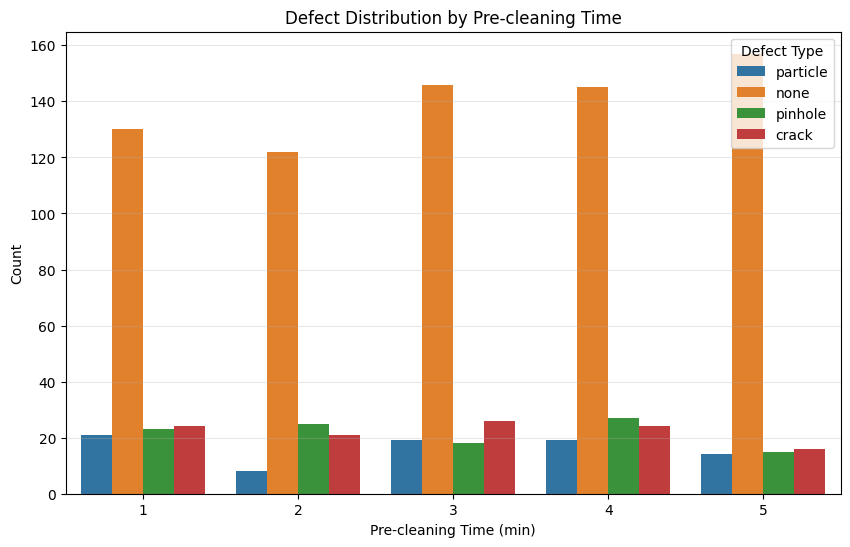


 [최종 종합 공정 제안서]
 1. 가스 유량(Gas Flow): 1,900 sccm으로 하향 조정하여 '균일도' 극대화 (Golden Recipe)
 2. 챔버 압력(Pressure): 0.5 atm 이상 유지하여 'Particle' 발생 차단
 3. 세정 시간(Cleaning): 표준 시간을 5분으로 설정하여 초기 오염 방지
 4. 산화 시간(Time): 최소 35분 이상 확보하여 막 형성을 안정화하고 'Pinhole' 예방


In [ ]:
# [5] 최적의 생산 조건 발굴 (Golden Recipe Analysis)
# 목표: 결함 없음(None) + 두께 적절(300~320nm) + 균일도 최상(1.0 미만)
# 이 조건을 모두 만족하는 '완벽한 웨이퍼'들의 공통점을 찾습니다.

golden_wafers = df[
    (df['defect_type'] == 'none') &
    (df['oxide_thickness'] >= 300) & (df['oxide_thickness'] <= 320) &
    (df['uniformity'] < 1.0)
]

others = df.drop(golden_wafers.index)

print("\n" + "="*40)
print(f" 🌟 Golden Wafer (완벽한 품질) 분석 (총 {len(golden_wafers)}개 발견)")
print("="*40)

# 가스 유량 비교 검증
t_stat, p_val_golden = stats.ttest_ind(golden_wafers['gas_flow_rate'], others['gas_flow_rate'], equal_var=False)

print(f"\n[Golden Wafer vs 일반 Wafer 가스 유량 비교]")
print(f"   - Golden 평균 유량 : {golden_wafers['gas_flow_rate'].mean():.1f} sccm")
print(f"   - 일반 평균 유량   : {others['gas_flow_rate'].mean():.1f} sccm")
print(f"   - 가스 유량 차이 검증 P-value : {p_val_golden:.5f}")

if p_val_golden < 0.05:
    print("   => 🎯 핵심 발견: 가스 유량을 1,900 sccm 수준으로 낮추는 것이 품질 혁신의 열쇠입니다!")

# 시각화: 세정 시간별 결함 분포 (Bar Chart)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='precleaning_time', hue='defect_type')
plt.title('Defect Distribution by Pre-cleaning Time')
plt.xlabel('Pre-cleaning Time (min)')
plt.ylabel('Count')
plt.legend(title='Defect Type')
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\n" + "="*60)
print(" [최종 종합 공정 제안서]")
print(" 1. 가스 유량(Gas Flow): 1,900 sccm으로 하향 조정하여 '균일도' 극대화 (Golden Recipe)")
print(" 2. 챔버 압력(Pressure): 0.5 atm 이상 유지하여 'Particle' 발생 차단")
print(" 3. 세정 시간(Cleaning): 표준 시간을 5분으로 설정하여 초기 오염 방지")
print(" 4. 산화 시간(Time): 최소 35분 이상 확보하여 막 형성을 안정화하고 'Pinhole' 예방")
print("="*60)

결론: 고품질 및 무결점 생산을 위한 핵심 인자
품질이 좋고 결함이 없는 'Golden Wafer'를 생산하기 위해 분석한 결과, '가스 유량의 최적화'가 품질(균일도)을 결정짓는 핵심 인자이며, '압력 및 세정 시간 관리'가 잔여 결함(Particle, Pinhole)을 제거하는 필수 조건임이 확인되었습니다.

통계적 분석 결과:

가스 유량(Gas Flow): 최고 품질(Golden) 그룹과 일반 그룹 간의 가스 유량 차이는 통계적으로 매우 유의미(P-value < 0.001)했습니다. 유량이 낮을수록 균일도가 획기적으로 개선됩니다.

압력(Pressure): Particle(이물질)이 발생한 그룹은 정상 그룹 대비 챔버 압력이 통계적으로 유의하게 낮았습니다(P-value = 0.034).

세정 시간(Cleaning): 세정 시간이 5분일 때 불량률이 가장 낮은 경향성(Trend)이 확인되었습니다.

결함별 원인:

Particle: 공정 중 압력 저하(Low Pressure)로 인한 오염물 역류 및 불안정한 가스 흐름이 주원인입니다.

Pinhole: 산화막 두께 부족 및 짧은 공정 시간으로 인해 막이 치밀하게 형성되지 못한 것이 원인입니다.

[종합 공정 관리 제안]
**Low Flow(저유량) & Stable Pressure(정압) 기반의 Golden Recipe 적용**

-가스 유량 1,900 sccm 하향 조정 (품질 혁신):

균일도를 최상위 수준(< 1.0%)으로 유지하기 위해, 현재 평균 3,000 sccm인 가스 유량을 1,900 sccm 수준으로 과감히 낮춰야 합니다. 난류를 억제하고 층류(Laminar Flow)를 형성하여 웨이퍼 전면에 고른 산화막을 성장시킬 수 있습니다.

-챔버 압력 0.5 atm 이상 유지 (Particle 방어):

Particle 결함을 원천 차단하기 위해, 공정 중 챔버 압력이 0.5 atm 밑으로 떨어지지 않도록 배기 밸브(Throttle Valve) 제어를 강화하고 하한 인터락(Low Limit Interlock)을 설정해야 합니다.

-세정 시간 5분 표준화 (초기 오염 제거):

짧은 세정 시간은 초기 오염 제거 실패로 이어집니다. 생산성을 이유로 시간을 단축하지 말고, 불량률이 가장 낮은 5분을 표준 세정 시간(Standard Time)으로 고정해야 합니다.

-최소 산화 시간 35분 확보 (Pinhole 예방):

얇은 막을 증착하더라도 최소 35분 이상의 공정 시간을 확보하는 레시피를 설계하여, 산화막이 충분히 성장하고 치밀해질(Densification) 시간을 주어야 합니다.

짧게 압축한 최종 4가지 공정 제안입니다.

가스 유량은 1,900 sccm으로 낮춰주십시오.

압력은 0.5 atm 이상을 유지하십시오.

세정 시간은 5분으로 표준화하십시오.

산화 시간은 35분 이상 충분히 확보하십시오.